<a href="https://colab.research.google.com/github/melanieyes/linear-regression/blob/main/nonlinear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Data

In [4]:
df = pd.read_csv('./Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = df.Level
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
y = df.Salary
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


Text(0, 0.5, 'Salary')

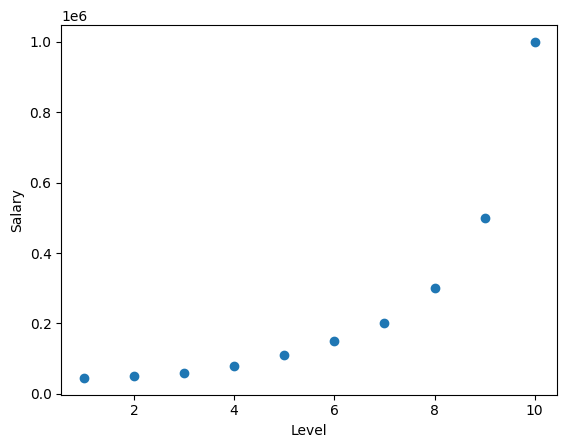

In [7]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

#Linear Regression

In [8]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [9]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [10]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [11]:
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [12]:
linear_model = LinearRegression(X_linear, y, num_epochs=100)
linear_model.fit()

Epoch: 0 - Loss: 142915320976.01007
Epoch: 1 - Loss: 40361300391.887794
Epoch: 2 - Loss: 35586130524.94335
Epoch: 3 - Loss: 35297780781.56206
Epoch: 4 - Loss: 35215873300.97164
Epoch: 5 - Loss: 35144013306.41524
Epoch: 6 - Loss: 35073185097.69757
Epoch: 7 - Loss: 35002970237.42072
Epoch: 8 - Loss: 34933344783.104416
Epoch: 9 - Loss: 34864302932.02561
Epoch: 10 - Loss: 34795839753.16762
Epoch: 11 - Loss: 34727950394.60634
Epoch: 12 - Loss: 34660630046.81658
Epoch: 13 - Loss: 34593873940.663345
Epoch: 14 - Loss: 34527677346.98752
Epoch: 15 - Loss: 34462035576.26733
Epoch: 16 - Loss: 34396943978.285965
Epoch: 17 - Loss: 34332397941.802162
Epoch: 18 - Loss: 34268392894.22351
Epoch: 19 - Loss: 34204924301.282494
Epoch: 20 - Loss: 34141987666.71531
Epoch: 21 - Loss: 34079578531.943367
Epoch: 22 - Loss: 34017692475.75733
Epoch: 23 - Loss: 33956325114.00405
Epoch: 24 - Loss: 33895472099.275837
Epoch: 25 - Loss: 33835129120.60261
Epoch: 26 - Loss: 33775291903.146374
Epoch: 27 - Loss: 3371595620

{'loss': 33803517111.202618,
 'weight': array([-62217.42370951,  61757.94529367])}

In [13]:
y_pred = linear_model.predict(X_linear)

In [14]:
r2score(y_pred, y)

0.6219618568872953

In [15]:
linear_model.theta

array([-62217.42370951,  61757.94529367])

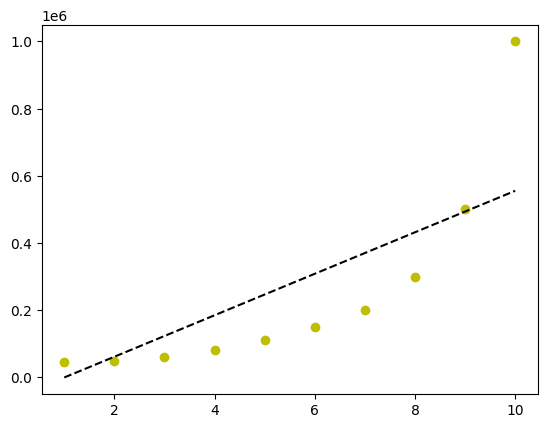

In [16]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

#Polymial Regression

In [17]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

##Polymial Regression with degree = 2

In [18]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [19]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [20]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 10675942835.424158
Epoch: 5001 - Loss: 10675822984.420094
Epoch: 5002 - Loss: 10675703159.342972
Epoch: 5003 - Loss: 10675583360.167452
Epoch: 5004 - Loss: 10675463586.868237
Epoch: 5005 - Loss: 10675343839.42004
Epoch: 5006 - Loss: 10675224117.797617
Epoch: 5007 - Loss: 10675104421.975735
Epoch: 5008 - Loss: 10674984751.929209
Epoch: 5009 - Loss: 10674865107.632862
Epoch: 5010 - Loss: 10674745489.061554
Epoch: 5011 - Loss: 10674625896.190166
Epoch: 5012 - Loss: 10674506328.99361
Epoch: 5013 - Loss: 10674386787.446829
Epoch: 5014 - Loss: 10674267271.524784
Epoch: 5015 - Loss: 10674147781.202465
Epoch: 5016 - Loss: 10674028316.454897
Epoch: 5017 - Loss: 10673908877.257124
Epoch: 5018 - Loss: 10673789463.584213
Epoch: 5019 - Loss: 10673670075.411276
Epoch: 5020 - Loss: 10673550712.713419
Epoch: 5021 - Loss: 10673431375.465815
Epoch: 5022 - Loss: 10673312063.64363
Epoch: 5023 - Loss: 10673192777.222084
Epoch: 5024 - Lo

{'loss': 11093714639.494432,
 'weight': array([ 14601.46651091, -47838.35894117,  12584.3602376 ])}

In [21]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736082645677874

In [22]:
poly_model.theta

array([ 14601.46651091, -47838.35894117,  12584.3602376 ])

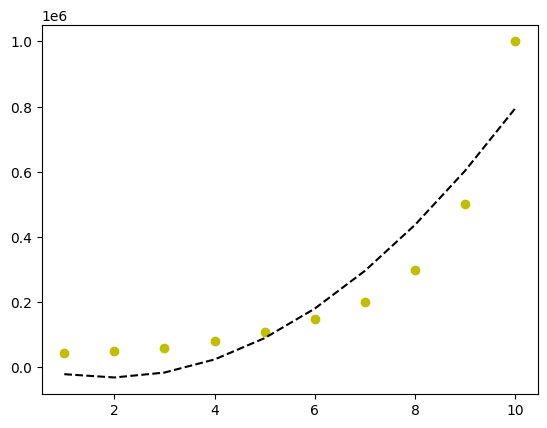

In [23]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

##Polymial Regression with degree = 3

In [24]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [25]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [26]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.000001, num_epochs=500)
poly_model.fit()

Epoch: 0 - Loss: 143193933591.89423
Epoch: 1 - Loss: 55932187246.9811
Epoch: 2 - Loss: 24588632126.11131
Epoch: 3 - Loss: 13330143193.654964
Epoch: 4 - Loss: 9285941385.272863
Epoch: 5 - Loss: 7833015072.509152
Epoch: 6 - Loss: 7310840334.456263
Epoch: 7 - Loss: 7122979196.567243
Epoch: 8 - Loss: 7055199118.720189
Epoch: 9 - Loss: 7030550638.916384
Epoch: 10 - Loss: 7021394539.96651
Epoch: 11 - Loss: 7017803184.843959
Epoch: 12 - Loss: 7016210699.135022
Epoch: 13 - Loss: 7015336268.43593
Epoch: 14 - Loss: 7014719841.324298
Epoch: 15 - Loss: 7014196173.45886
Epoch: 16 - Loss: 7013705911.257319
Epoch: 17 - Loss: 7013227735.681223
Epoch: 18 - Loss: 7012753989.191345
Epoch: 19 - Loss: 7012281921.276228
Epoch: 20 - Loss: 7011810543.963109
Epoch: 21 - Loss: 7011339502.359576
Epoch: 22 - Loss: 7010868668.9671755
Epoch: 23 - Loss: 7010397997.964386
Epoch: 24 - Loss: 7009927472.866905
Epoch: 25 - Loss: 7009457087.728009
Epoch: 26 - Loss: 7008986840.385912
Epoch: 27 - Loss: 7008516730.038355
Epo

{'loss': 7333571003.90852,
 'weight': array([ 6.22379763e-01, -4.74307901e+01, -2.34144270e+02,  8.55528958e+02])}

In [27]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.915688266706096

In [28]:
poly_model.theta

array([ 6.22379763e-01, -4.74307901e+01, -2.34144270e+02,  8.55528958e+02])

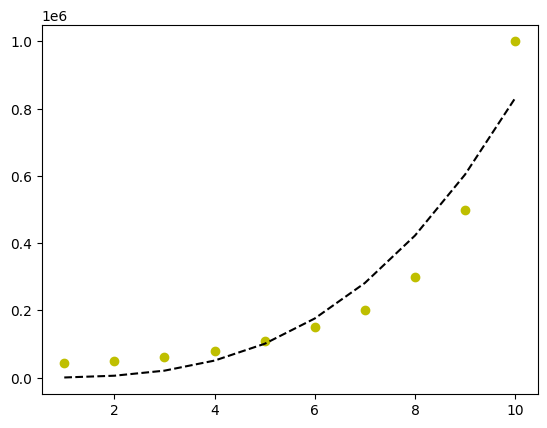

In [29]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

## **Sklearn**

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2)

In [32]:
X.to_frame()

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [33]:
X_poly = poly_features.fit_transform(X.to_frame())
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [34]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.000001, num_epochs=500)
poly_model.fit()

Epoch: 0 - Loss: 142935917229.98453
Epoch: 1 - Loss: 141630251703.38715
Epoch: 2 - Loss: 140337973648.01938
Epoch: 3 - Loss: 139058945792.06903
Epoch: 4 - Loss: 137793032271.27505
Epoch: 5 - Loss: 136540098614.49492
Epoch: 6 - Loss: 135300011729.42001
Epoch: 7 - Loss: 134072639888.43716
Epoch: 8 - Loss: 132857852714.63574
Epoch: 9 - Loss: 131655521167.95749
Epoch: 10 - Loss: 130465517531.48918
Epoch: 11 - Loss: 129287715397.89507
Epoch: 12 - Loss: 128121989655.98904
Epoch: 13 - Loss: 126968216477.44405
Epoch: 14 - Loss: 125826273303.63815
Epoch: 15 - Loss: 124696038832.63516
Epoch: 16 - Loss: 123577393006.29887
Epoch: 17 - Loss: 122470216997.53964
Epoch: 18 - Loss: 121374393197.69121
Epoch: 19 - Loss: 120289805204.01767
Epoch: 20 - Loss: 119216337807.34785
Epoch: 21 - Loss: 118153876979.83691
Epoch: 22 - Loss: 117102309862.8534
Epoch: 23 - Loss: 116061524754.99028
Epoch: 24 - Loss: 115031411100.19913
Epoch: 25 - Loss: 114011859476.0459
Epoch: 26 - Loss: 113002761582.08707
Epoch: 27 - L

{'loss': 40285489754.678246,
 'weight': array([  73.59161504,  663.89980456, 6469.53605838])}

In [35]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.797712956457069

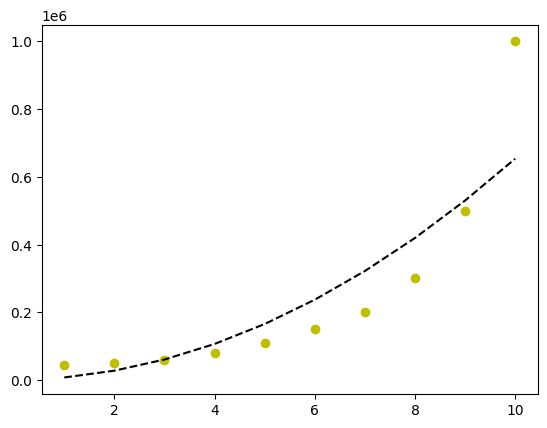

In [36]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

# **Curve Fit from Scipy**

In [37]:
from scipy import optimize

In [38]:
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

In [39]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [40]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [41]:
alpha, beta = optimize.curve_fit(func, xdata = X, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=4589.3907482016875, beta=0.5346899470728618


In [42]:
y_pred = func(X, alpha, beta)

In [43]:
r2score(y_pred, y)

0.9808034598161862

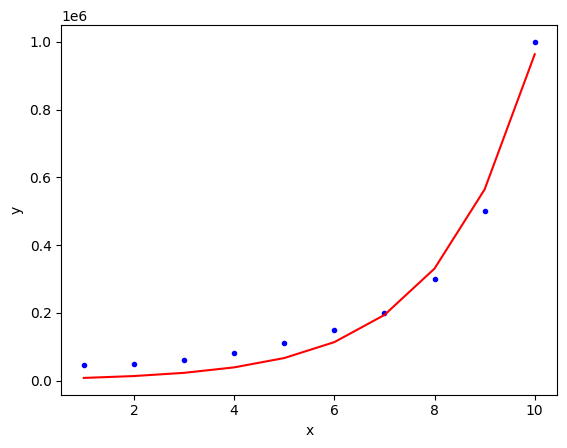

In [44]:
plt.plot(X, y, 'b.')
plt.plot(X, alpha*np.exp(beta*X), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()